In [23]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *
from encapsulage import *
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


In [24]:
import base64
from IPython.display import Image, display

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

In [25]:
def creerEncoder(dimensions, fActivation):
  """Creer un encoder
  dimensions: liste des tailles des couches
  fActivation: la fonction d'activation pour chaque couche
  """
  l_module = []
  for i in range(len(dimensions)-1):
    l_module.append(Linear(dimensions[i],dimensions[i+1], mode = 1)) # mode 1: xavier uniforme
    l_module.append(fActivation)
  return l_module

def creerDecoder(dimensions, fActivation, fSortie = Sigmoide()):
  """Creer un decoder
  dimensions: liste des tailles des couches
  fActivation: la fonction d'activation pour chaque couche
  """
  l_module = []
  for i in range(len(dimensions)-1):
    l_module.append(Linear(dimensions[i],dimensions[i+1], mode = 1)) # mode 1: xavier uniforme
    l_module.append(fActivation)
  l_module[-1] = fSortie #changer la fonction d'activation de la derniere couche par fSortie
  return l_module

#Application avec Tangente hyperbolique

In [26]:
print("Encodage")
mm("""
graph LR;
    N1(Lin.256,100)--> N2(TanH);
    N2--> N3(Lin.100,10);
    N3--> N4(TanH);
""")

print("Décodage")
mm("""
graph LR;
    N5(Lin.10,100)--> N6(TanH);
    N6--> N7(Lin.100,256);
    N7--> N8(Sigmoide);
""")

Encodage


Décodage


100%|██████████| 20/20 [00:36<00:00,  1.80s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

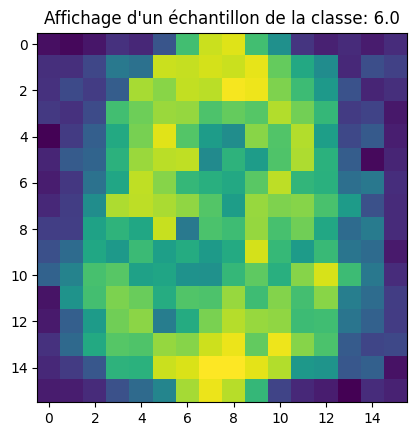

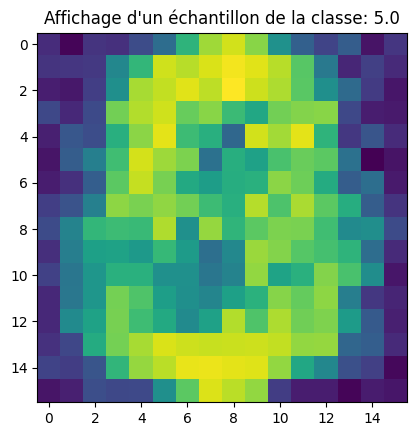

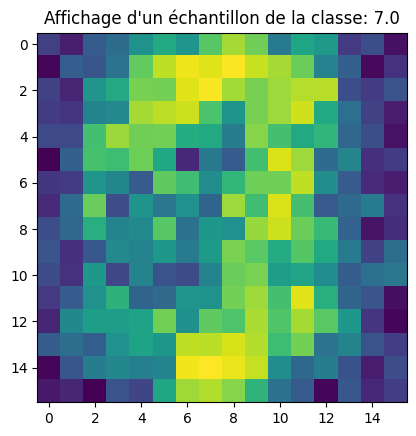

In [27]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, TanH())
l_decoder = creerDecoder(dim[::-1], TanH(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# MSCE -> peu performante
# BCE -> OK
# MSE -> moins performante que BCE

#SGD
nb_epoch = 20
SGD(net, data, MSELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

100%|██████████| 20/20 [00:37<00:00,  1.88s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

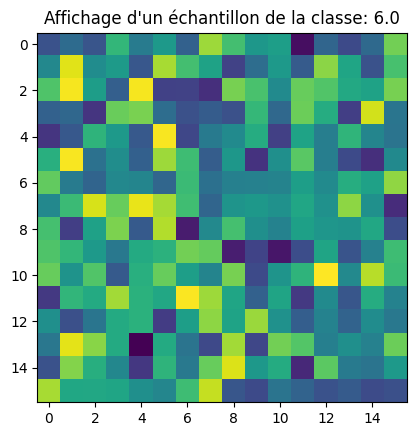

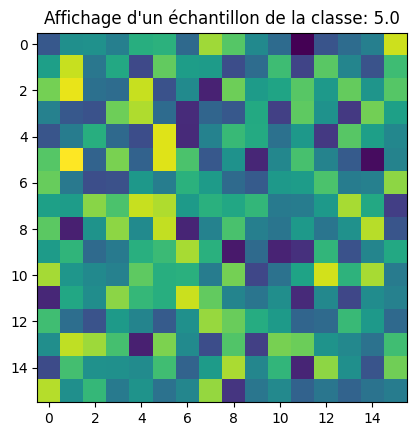

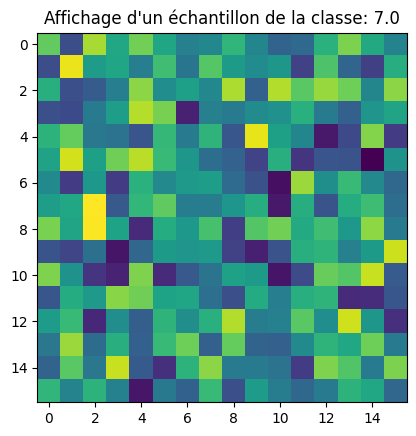

In [28]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, TanH())
l_decoder = creerDecoder(dim[::-1], TanH(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# SMCE -> peu performante
# BCE -> OK
# MSE -> moins performante que BCE

#SGD
nb_epoch = 20
SGD(net, data, SMCELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

100%|██████████| 20/20 [00:38<00:00,  1.91s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

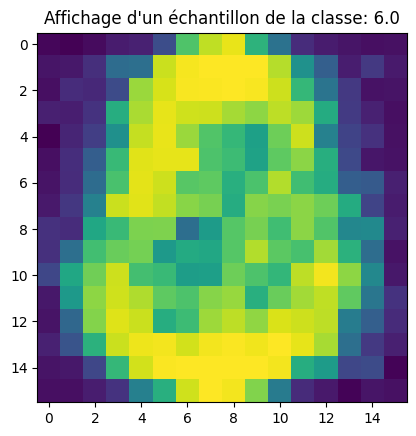

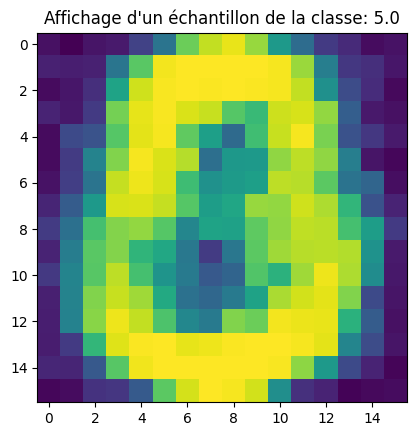

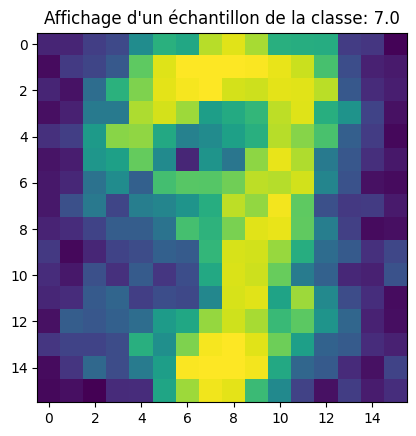

In [29]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, TanH())
l_decoder = creerDecoder(dim[::-1], TanH(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# MSCE -> peu performante
# BCE -> OK
# MSE -> moins performante que BCE

#SGD
nb_epoch = 20
SGD(net, data, BCELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

## K-MEANS

In [30]:
from sklearn.cluster import KMeans

MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_latent)

In [31]:
# Évaluation des performances
cluster_labels = kmeans.labels_

# Calculer purity
for i in np.unique(Y):
  inx_cluster = np.where(cluster_labels==i)[0]
  Y_cluster = Y[inx_cluster]
  val, occ = np.unique(Y_cluster, return_counts=True)
  print(f"Purity cluster {i}, valeur majoritaire {val[np.argmax(occ)]}: {np.max(occ)/np.sum(occ)}")

Purity cluster 0.0, valeur majoritaire 2.0: 0.6351931330472103
Purity cluster 1.0, valeur majoritaire 1.0: 0.7550713749060857
Purity cluster 2.0, valeur majoritaire 7.0: 0.5819070904645477
Purity cluster 3.0, valeur majoritaire 5.0: 0.3468354430379747
Purity cluster 4.0, valeur majoritaire 0.0: 0.6046195652173914
Purity cluster 5.0, valeur majoritaire 9.0: 0.39281437125748503
Purity cluster 6.0, valeur majoritaire 6.0: 0.7563694267515924
Purity cluster 7.0, valeur majoritaire 3.0: 0.6666666666666666
Purity cluster 8.0, valeur majoritaire 3.0: 0.2996031746031746
Purity cluster 9.0, valeur majoritaire 0.0: 0.40979955456570155


## Projection 2D avec T-SNE

In [32]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_latent)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.015s...
[t-SNE] Computed neighbors for 7291 samples in 0.519s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 0.124661
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.750946
[t-SNE] KL divergence after 1000 iterations: 1.234020


[Text(0.5, 1.0, 'T-SNE projection sur data manuscrits')]

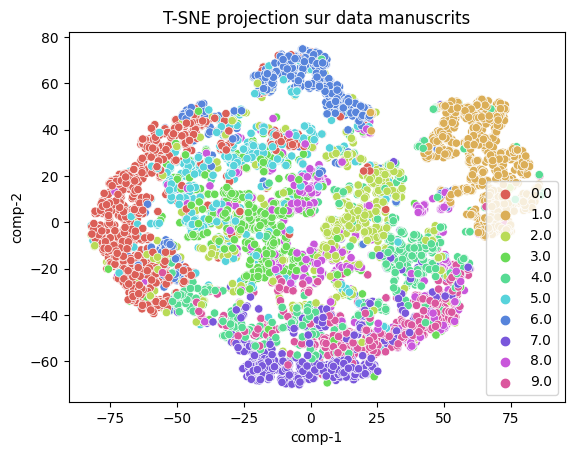

In [33]:
#plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE projection sur data manuscrits")

#Application avec ReLU

In [34]:
print("Encodage")
mm("""
graph LR;
    N1(Lin.256,100)--> N2(ReLU);
    N2--> N3(Lin.100,10);
    N3--> N4(ReLU);
""")

print("Décodage")
mm("""
graph LR;
    N5(Lin.10,100)--> N6(ReLU);
    N6--> N7(Lin.100,256);
    N7--> N8(Sigmoide);
""")

Encodage


Décodage


100%|██████████| 20/20 [00:35<00:00,  1.78s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

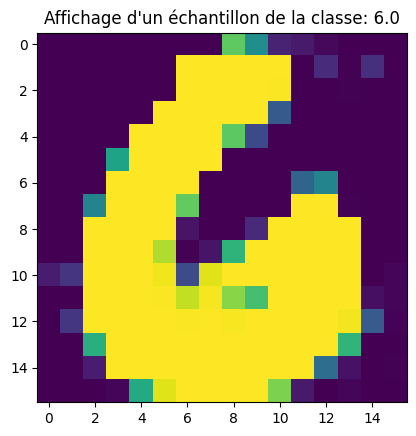

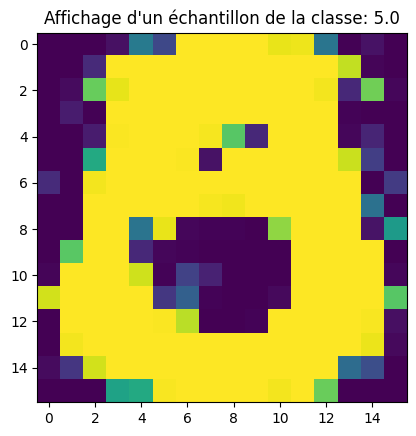

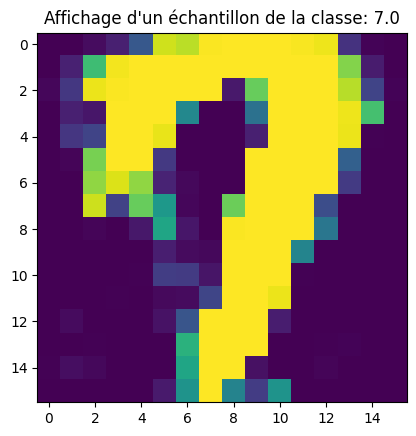

In [35]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, ReLU())
l_decoder = creerDecoder(dim[::-1], ReLU(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# eps 3e-6, mini-b 32, epochs 20: ressembler un peu
# eps 4e-6,mini-b 32, epochs 20: un peu moins

#SGD
nb_epoch = 20
SGD(net, data, BCELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

## K-MEANS

In [36]:
MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_latent)
# Évaluation des performances
cluster_labels = kmeans.labels_

# Calculer purity
for i in np.unique(Y):
  inx_cluster = np.where(cluster_labels==i)[0]
  Y_cluster = Y[inx_cluster]
  val, occ = np.unique(Y_cluster, return_counts=True)
  print(f"Purity cluster {i}, valeur majoritaire {val[np.argmax(occ)]}: {np.max(occ)/np.sum(occ)}")

Purity cluster 0.0, valeur majoritaire 2.0: 0.36324786324786323
Purity cluster 1.0, valeur majoritaire 6.0: 0.602921646746348
Purity cluster 2.0, valeur majoritaire 3.0: 0.21828571428571428
Purity cluster 3.0, valeur majoritaire 1.0: 0.9179566563467493
Purity cluster 4.0, valeur majoritaire 3.0: 0.4642438452520516
Purity cluster 5.0, valeur majoritaire 9.0: 0.4888597640891219
Purity cluster 6.0, valeur majoritaire 0.0: 0.9365750528541226
Purity cluster 7.0, valeur majoritaire 1.0: 0.9028697571743929
Purity cluster 8.0, valeur majoritaire 0.0: 0.7512953367875648
Purity cluster 9.0, valeur majoritaire 7.0: 0.375


## Projection 2D avec T-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.014s...
[t-SNE] Computed neighbors for 7291 samples in 0.365s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 3.098193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.686478
[t-SNE] KL divergence after 1000 iterations: 1.291913


[Text(0.5, 1.0, 'T-SNE projection sur data manuscrits')]

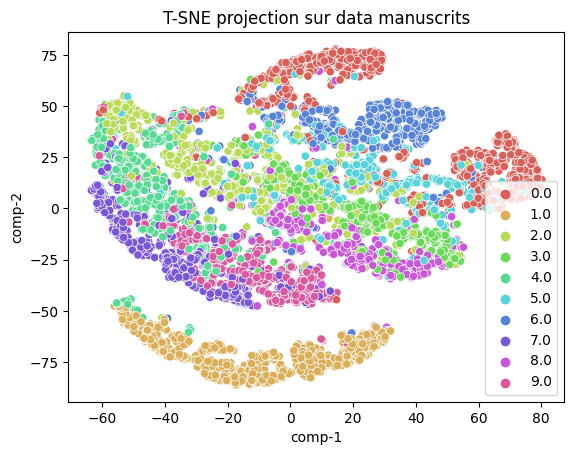

In [37]:
MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_latent)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
#plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE projection sur data manuscrits")

# Utilser la représentation latente pour la classification

In [38]:
# X_latent de ReLU
Y = Y.astype(int)
Y_onehot = np.zeros((Y.size,10));
Y_onehot[np.arange(Y.size),Y]=1
data = np.array([np.array([x,y]).tolist() for x, y in zip(X_latent,Y_onehot)])

100%|██████████| 30/30 [00:05<00:00,  5.40it/s]


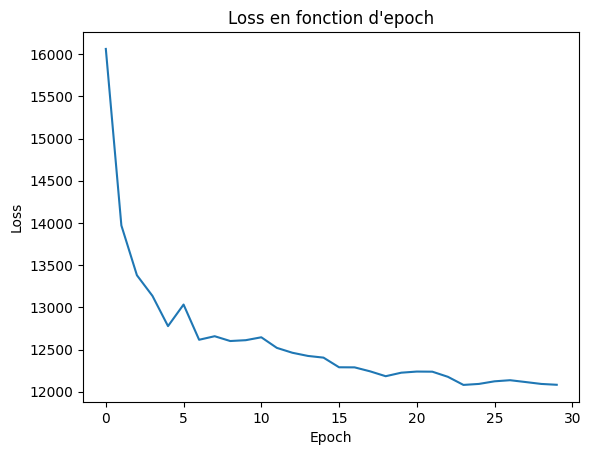

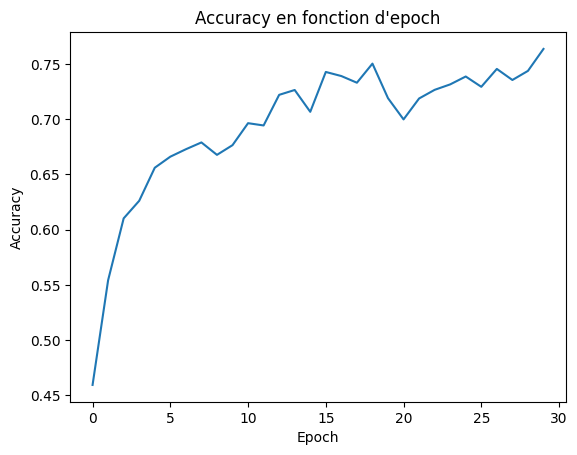

In [39]:
np.random.seed(6)
#ini
nb_couche_latentes = 150
MLin1 = Linear(X_latent.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 10) # 10 classes
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)

#SGD
nb_epoch = 30
l,s = SGD(net, data, SMCELoss(), eps=1e-2, batch_taille=1000, nb_iter=nb_epoch)
#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()
# accuracy
plt.plot(np.arange(nb_epoch),s)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction d'epoch")
plt.show()

In [40]:
Xt,Yt = load('../data/usps_test.txt')
# Encoder X test
Xt_latent = MEncoder.forward(Xt)
Yt = Yt.astype(int)
Yt_onehot = np.zeros((Yt.size,10));
Yt_onehot[np.arange(Yt.size),Yt]=1

print("Score sur data train:", Optim(net, SMCELoss(),eps=1e-2).score(X_latent, Y_onehot))
print("Score sur data test:", Optim(net, SMCELoss(),eps=1e-2).score(Xt_latent, Yt_onehot))

Score sur data train: 0.7635440954601563
Score sur data test: 0.7284504235176881


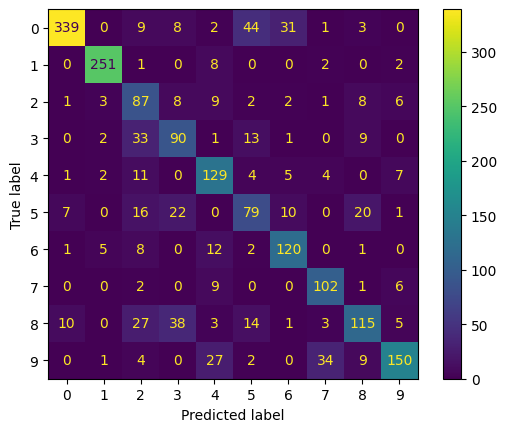

In [41]:
y_test_pred = np.argmax(net.forward(Xt_latent), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test_pred, Yt)

# ECG Anormal

In [42]:
df = pd.read_csv('../data/ecg.csv', header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [43]:
X, Y = df[df.columns[:-1]], df[df.columns[-1]].to_numpy()
X_normalise = (X-X.min())/(X.max()-X.min()) # normaliser 0-1 pour sigmoide
X_normalise = X_normalise.to_numpy()

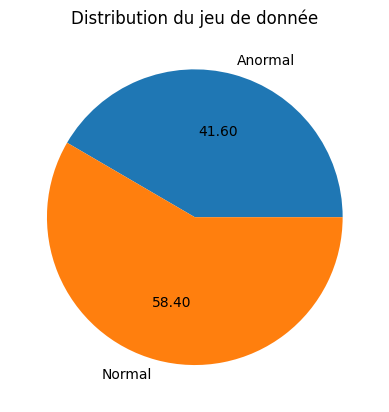

In [44]:
v, count = np.unique(Y, return_counts = True)
plt.pie(count,labels=["Anormal", "Normal"], autopct="%.2f")
plt.title("Distribution du jeu de donnée")
plt.show()

In [45]:
# séparer les exemples normaux et anormaux qui permets d'utiliser les encodeur et decodeur
# normal
inx_normal = np.where(Y == 1)[0]
Y_normal = Y[inx_normal].reshape(-1,1) # batch x dim
X_normal = X_normalise[inx_normal]
# anormal
inx_anormal = np.where(Y == 0)[0]
Y_anormal = Y[inx_anormal].reshape(-1,1) # batch x dim
X_anormal = X_normalise[inx_anormal]

Text(0.5, 1.0, 'ECG anormal')

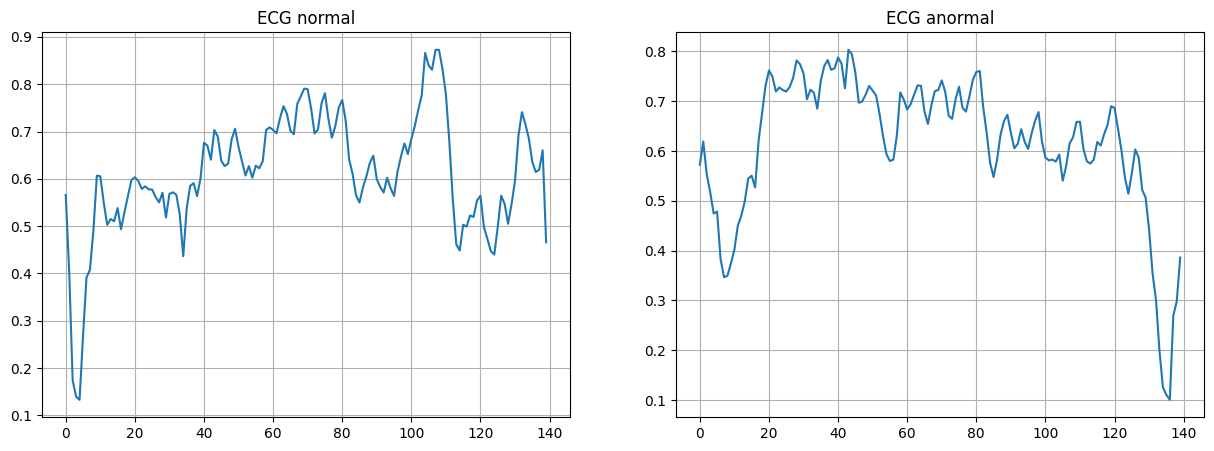

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].grid()
axes[0].plot(np.arange(X_normal.shape[1]), X_normal[0])
axes[0].set_title(f"ECG normal")

axes[1].grid()
axes[1].plot(np.arange(X_anormal.shape[1]), X_anormal[0])
axes[1].set_title(f"ECG anormal")

In [47]:
from sklearn.model_selection import train_test_split

Y_ = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_normal, X_normal, test_size = 0.3, random_state = 42)

data_train = np.array([np.array([x,y]).tolist() for x, y in zip(X_train,Y_train)])

# MSE Loss

100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


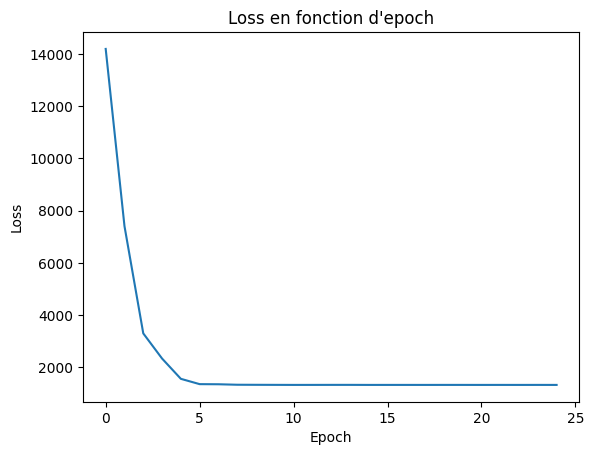

In [48]:
dim = [140,32,16, 8]
l_encoder = creerEncoder(dim, TanH())
l_decoder = creerDecoder(dim[::-1], TanH(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# eps 3e-6, mini-b 32, epochs 20: ressembler un peu
# eps 4e-6,mini-b 32, epochs 20: un peu moins

#SGD
nb_epoch = 25
l, _ = SGD(net, data_train, MSELoss(), eps=5e-4, batch_taille=500, nb_iter=nb_epoch)

#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()

Test sur data normal

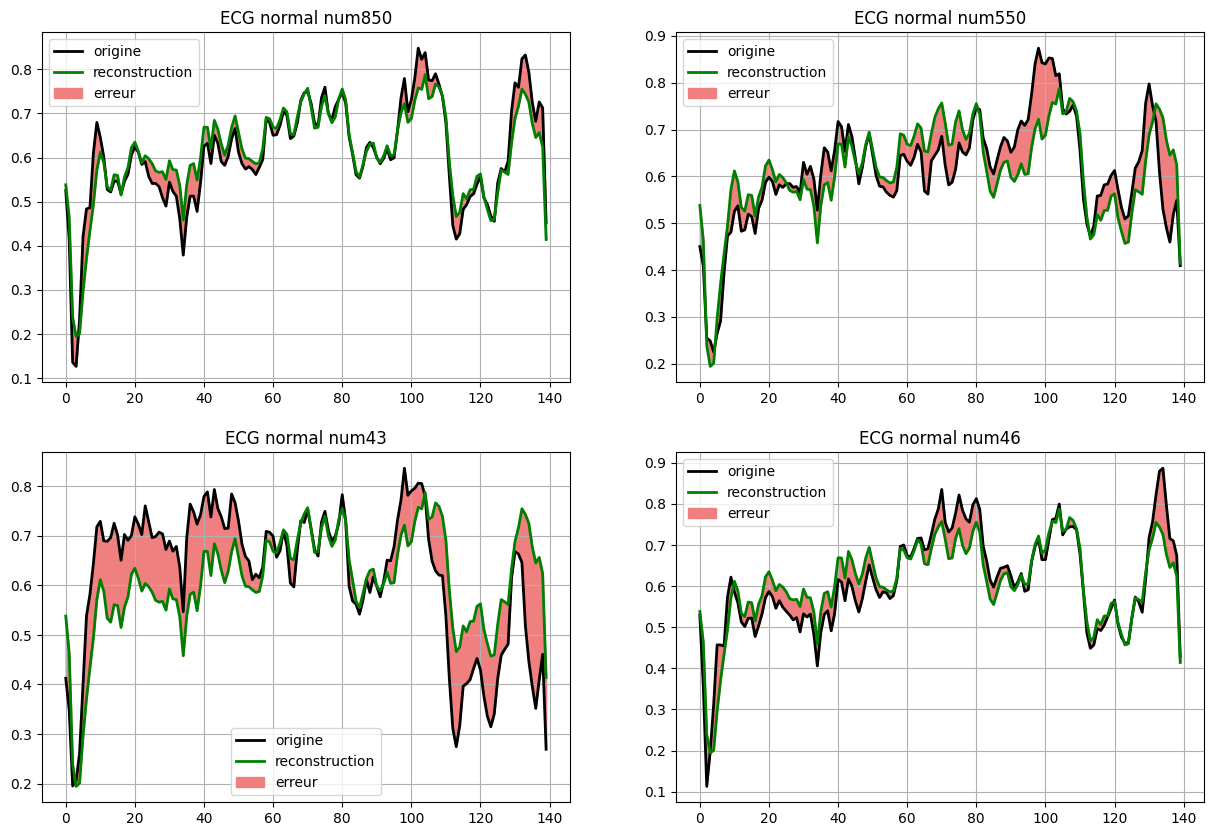

In [49]:
Img_reconstruit = net.forward(X_test)

fig,axes = plt.subplots(2,2, figsize = (15, 10))

inx = np.random.choice(np.arange(len(X_test)), 4)

for i in range(len(inx)):
  j = i//2
  axes[j,i%2].grid()
  axes[j,i%2].plot(X_test[inx[i]], 'black',linewidth=2.0,label='origine')
  axes[j,i%2].plot(Img_reconstruit[inx[i]], 'green',linewidth=2.0,label='reconstruction')
  axes[j,i%2].fill_between(np.arange(140), Img_reconstruit[inx[i]], X_test[inx[i]], color='lightcoral',label='erreur')
  axes[j,i%2].set_title(f"ECG normal num{inx[i]}")
  axes[j,i%2].legend()

Test sur data anormal

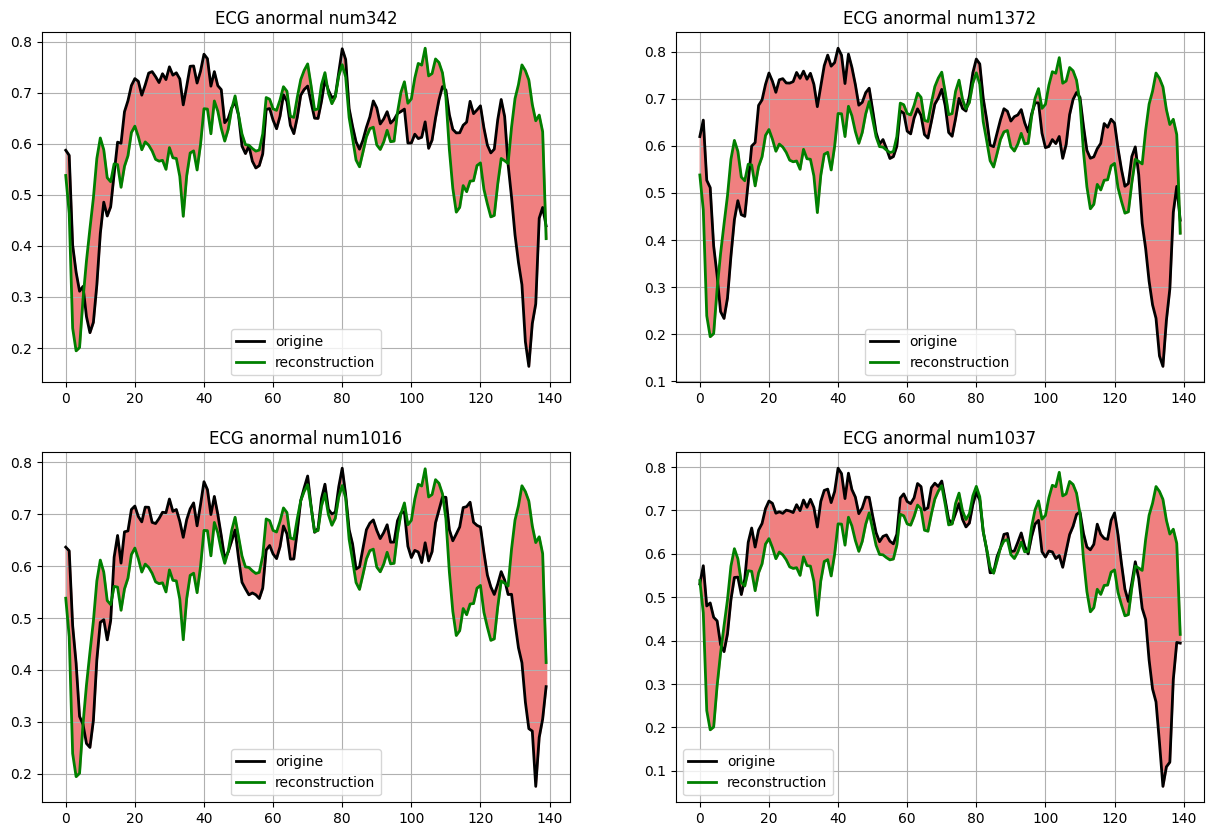

In [50]:
Img_reconstruit = net.forward(X_anormal)

fig,axes = plt.subplots(2,2, figsize = (15, 10))

inx = np.random.choice(np.arange(len(X_anormal)), 4)

for i in range(len(inx)):
  j = i//2
  axes[j,i%2].grid()
  line1, = axes[j,i%2].plot(X_anormal[inx[i]], 'black',linewidth=2.0,label='origine')
  line2, = axes[j,i%2].plot(Img_reconstruit[inx[i]], 'green',linewidth=2.0,label='reconstruction')
  axes[j,i%2].fill_between(np.arange(140), Img_reconstruit[inx[i]], X_anormal[inx[i]], color='lightcoral')
  axes[j,i%2].set_title(f"ECG anormal num{inx[i]}")
  axes[j,i%2].legend(handles=[line1, line2])

# MAE Loss

100%|██████████| 25/25 [00:04<00:00,  5.63it/s]


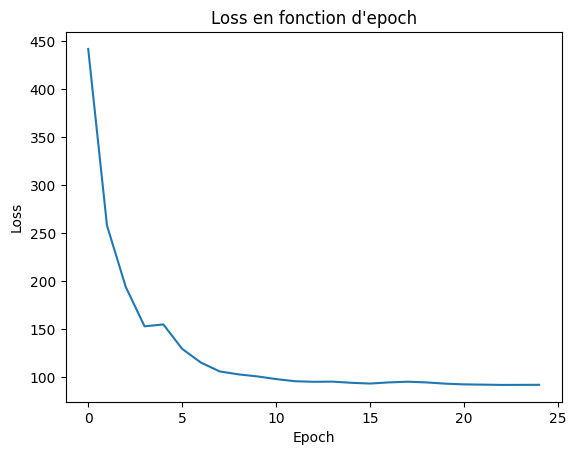

In [51]:
dim = [140,32,16, 8]
l_encoder = creerEncoder(dim, ReLU())
l_decoder = creerDecoder(dim[::-1], ReLU(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# eps 3e-6, mini-b 32, epochs 20: ressembler un peu
# eps 4e-6,mini-b 32, epochs 20: un peu moins

#SGD
nb_epoch = 25
l, _ = SGD(net, data_train, MAELoss(), eps=1e-4, batch_taille=500, nb_iter=nb_epoch)

#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()


Test sur data normal

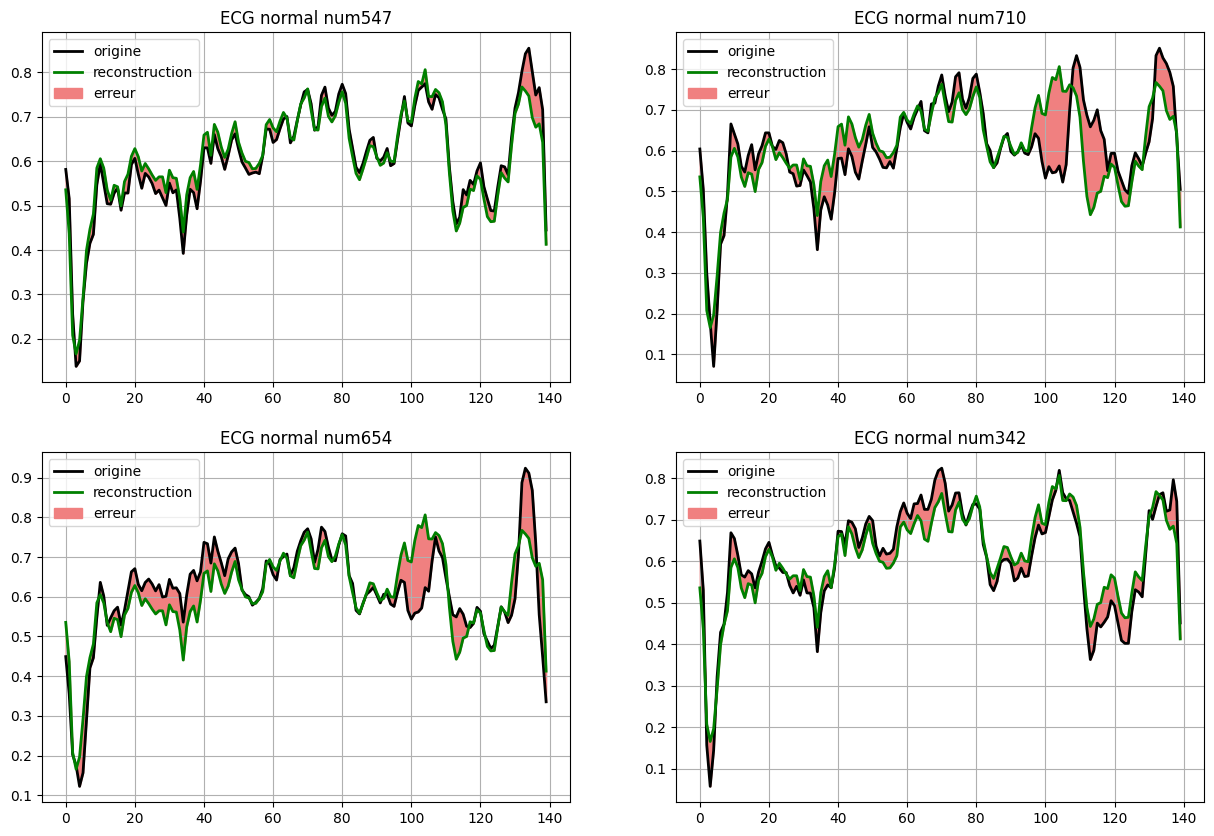

In [52]:
Img_reconstruit = net.forward(X_test)

fig,axes = plt.subplots(2,2, figsize = (15, 10))

inx = np.random.choice(np.arange(len(X_test)), 4)

for i in range(len(inx)):
  j = i//2
  axes[j,i%2].grid()
  axes[j,i%2].plot(X_test[inx[i]], 'black',linewidth=2.0,label='origine')
  axes[j,i%2].plot(Img_reconstruit[inx[i]], 'green',linewidth=2.0,label='reconstruction')
  axes[j,i%2].fill_between(np.arange(140), Img_reconstruit[inx[i]], X_test[inx[i]], color='lightcoral',label='erreur')
  axes[j,i%2].set_title(f"ECG normal num{inx[i]}")
  axes[j,i%2].legend()

Test sur data anormal

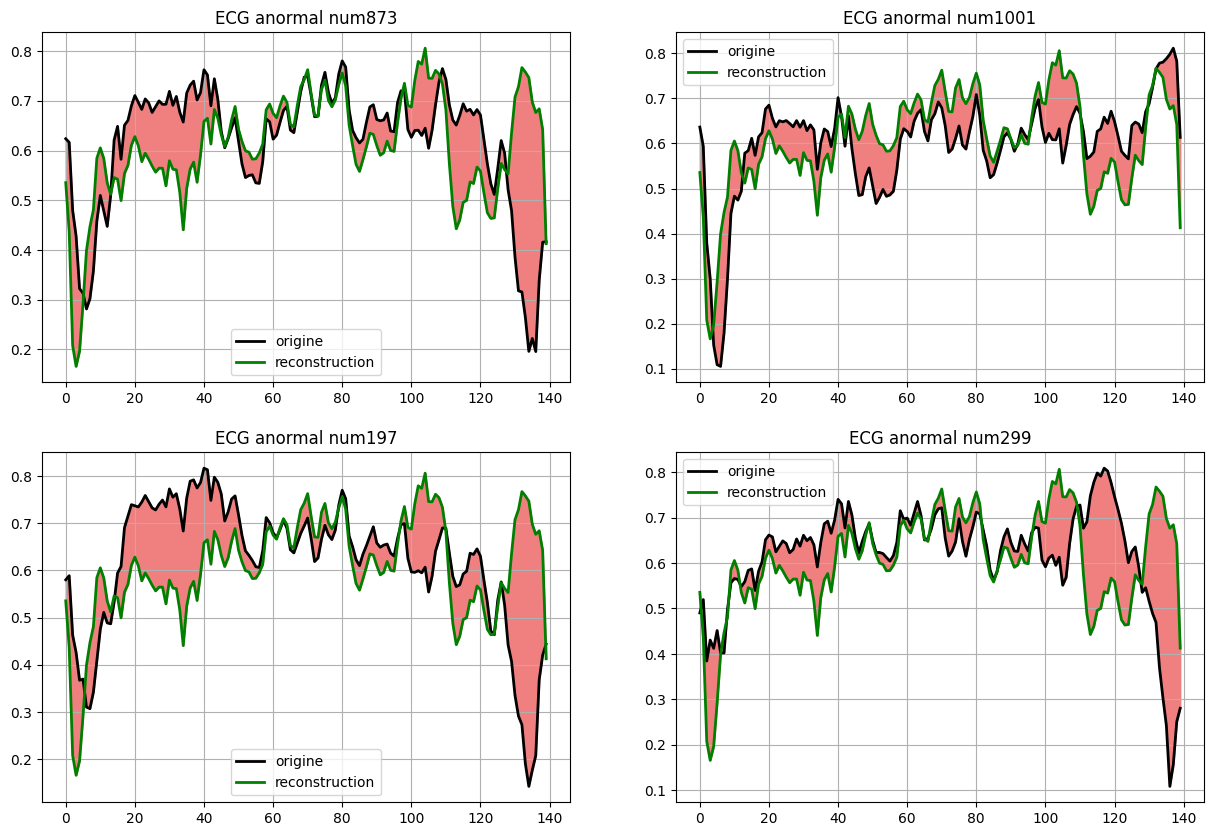

In [53]:
Img_reconstruit = net.forward(X_anormal)

fig,axes = plt.subplots(2,2, figsize = (15, 10))

inx = np.random.choice(np.arange(len(X_anormal)), 4)

for i in range(len(inx)):
  j = i//2
  axes[j,i%2].grid()
  line1, = axes[j,i%2].plot(X_anormal[inx[i]], 'black',linewidth=2.0,label='origine')
  line2, = axes[j,i%2].plot(Img_reconstruit[inx[i]], 'green',linewidth=2.0,label='reconstruction')
  axes[j,i%2].fill_between(np.arange(140), Img_reconstruit[inx[i]], X_anormal[inx[i]], color='lightcoral')
  axes[j,i%2].set_title(f"ECG anormal num{inx[i]}")
  axes[j,i%2].legend(handles=[line1, line2])